In [1]:
# Repeat the problem studied in class for your selected neighborhood
# using more types of properties. See if adding additional features
# makes a difference

# filter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer

In [2]:
# load in redfin dataset
redfin = pd.read_csv("../redfin_2020-07-28-10-26-20.csv")

list(redfin.columns)

['SALE TYPE',
 'SOLD DATE',
 'PROPERTY TYPE',
 'ADDRESS',
 'CITY',
 'STATE OR PROVINCE',
 'ZIP OR POSTAL CODE',
 'PRICE',
 'BEDS',
 'BATHS',
 'LOCATION',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 'DAYS ON MARKET',
 '$/SQUARE FEET',
 'HOA/MONTH',
 'STATUS',
 'NEXT OPEN HOUSE START TIME',
 'NEXT OPEN HOUSE END TIME',
 'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
 'SOURCE',
 'MLS#',
 'FAVORITE',
 'INTERESTED',
 'LATITUDE',
 'LONGITUDE']

In [3]:
# clean up missing values in dataset

redfin.loc[redfin['PROPERTY TYPE'] == 'Vacant Land', 'BEDS'] = 0
redfin.loc[redfin['PROPERTY TYPE'] == 'Vacant Land', 'BATHS'] = 0

redfin.loc[redfin['PROPERTY TYPE'] == 'Vacant Land']

SALE TYPE  SOLD DATE PROPERTY TYPE                            ADDRESS  \
7    MLS Listing        NaN   Vacant Land                  address available   
8    MLS Listing        NaN   Vacant Land            no NW address available   
94   MLS Listing        NaN   Vacant Land          0 San Francisquito Cyn Rd   
139  MLS Listing        NaN   Vacant Land                      0 Esguerra Rd   
151  MLS Listing        NaN   Vacant Land                   9999 Vasquez Cyn   
..           ...        ...           ...                                ...   
302  MLS Listing        NaN   Vacant Land           0 Spring St & Chrisco St   
303  MLS Listing        NaN   Vacant Land          0 Spring St. & Chrisco St   
304  MLS Listing        NaN   Vacant Land     0 Spring Street and Chrisco St   
305  MLS Listing        NaN   Vacant Land  0 Rainbow Glen & Ave. of the Oaks   
306  MLS Listing        NaN   Vacant Land         0 Vac/Vic San Francisquito   

               CITY STATE OR PROVINCE  ZIP OR POSTAL CODE   PRICE  BEDS  \
7          Valencia                CA             91354.0   45000   0.0   
8          Valencia                CA             91354.0   45000   0.0   
94           Saugus                CA             91390.0  450000   0.0   
139          Saugus                CA                 NaN  150000   0.0   
151  Canyon Country                CA             91351.0  800000   0.0   
..              ...               ...                 ...     ...   ...   
302   Sleepy Valley                CA             91350.0   13999   0.0   
303   Sleepy Valley                CA             91350.0   13999   0.0   
304   Sleepy Valley                CA             91350.0   13999   0.0   
305         Newhall                CA             91321.0   70999   0.0   
306    Green Valley                CA             91350.0   19900   0.0   

     BATHS  ...  STATUS  NEXT OPEN HOUSE START TIME  NEXT OPEN HOUSE END TIME  \
7      0.0  ...  Active                         NaN                       NaN   
8      0.0  ...  Active                         NaN                       NaN   
94     0.0  ...  Active                         NaN                       NaN   
139    0.0  ...  Active                         NaN                       NaN   
151    0.0  ...  Active                         NaN                       NaN   
..     ...  ...     ...                         ...                       ...   
302    0.0  ...  Active                         NaN                       NaN   
303    0.0  ...  Active                         NaN                       NaN   
304    0.0  ...  Active                         NaN                       NaN   
305    0.0  ...  Active                         NaN                       NaN   
306    0.0  ...  Active                         NaN                       NaN   

     URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)  \
7    http://www.redfin.com/CA/Valencia/address-avai...                                            
8    http://www.redfin.com/CA/Santa-Clarita/no-NW-a...                                            
94   http://www.redfin.com/CA/Agua-Dulce/San-Franci...                                            
139  http://www.redfin.com/CA/Santa-Clarita/Esguerr...                                            
151  http://www.redfin.com/CA/Canyon-Country/9999-V...                                            
..                                                 ...                                            
302  http://www.redfin.com/CA/Sleepy-Valley/0-Sprin...                                            
303  http://www.redfin.com/CA/Sleepy-Valley/0-Sprin...                                            
304  http://www.redfin.com/CA/Agua-Dulce/0-N-Spring...                                            
305  http://www.redfin.com/CA/Santa-Clarita/Unknown...                                            
306  http://www.redfin.com/CA/Green-Valley/0-Vac-Vi...                             

In [4]:
# get property type values
print(np.unique(redfin['PROPERTY TYPE'], return_counts=True))

property_types = np.array(['Condo/Co-op', 'Mobile/Manufactured Home', 'Multi-Family (5+ Unit)', 'Single Family Residential', 'Townhouse', 'Vacant Land'])

redfin = redfin.loc[redfin['PROPERTY TYPE'].isin(property_types)]

(array(['Condo/Co-op', 'Mobile/Manufactured Home',
       'Multi-Family (2-4 Unit)', 'Multi-Family (5+ Unit)',
       'Single Family Residential', 'Townhouse', 'Vacant Land'],
      dtype=object), array([ 36,  35,   1,   6, 139,  26,  79]))


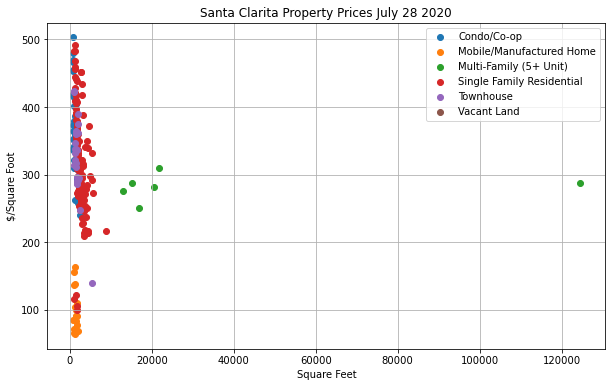

In [5]:
# make a scatter plot labeled by property type

# set up color array
colors = [
    'tab:blue','tab:orange','tab:green',
    'tab:red','tab:purple','tab:brown',
    'tab:pink','tab:gray','tab:olive',
    'tab:cyan'
]

# retrieve columns square feet, $/square feet, property type from
# the data frame and convert it to a numpy array
scatter_data = np.array(redfin[["SQUARE FEET","$/SQUARE FEET","PROPERTY TYPE"]])

for idx, entry in enumerate(property_types):
    # select rows for the current property type
    property_type_entries = scatter_data[:,2] == entry
    
    # get square feet for each property of current property type
    square_feet = scatter_data[property_type_entries][:,0]
    
    # get $/sf for each property of current property type
    dollar_square_feet = scatter_data[property_type_entries][:,1]
    
    # plot scatter of sf vs. $/sf
    plt.scatter(square_feet, dollar_square_feet, color=colors[idx], label=entry, marker='o')
    
plt.legend()
plt.grid()
plt.xlabel("Square Feet")
plt.ylabel("$/Square Foot")
plt.title("Santa Clarita Property Prices July 28 2020")
plt.gcf().set_size_inches(10,6)
plt.show()

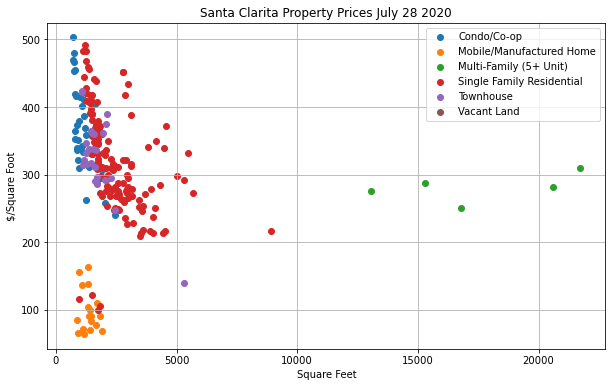

In [6]:
# cull outliers
redfin_culled = redfin.loc[(redfin['SQUARE FEET'] < 120000)]

# update scatter data
scatter_data = np.array(redfin_culled[["SQUARE FEET","$/SQUARE FEET","PROPERTY TYPE"]])

# plot again
for idx, entry in enumerate(property_types):
    property_type_entries = scatter_data[:,2] == entry
    square_feet = scatter_data[property_type_entries][:,0]
    dollar_square_feet = scatter_data[property_type_entries][:,1]
    
    plt.scatter(square_feet, dollar_square_feet, color=colors[idx], label=entry, marker='o')
    
plt.legend()
plt.grid()
plt.xlabel("Square Feet")
plt.ylabel("$/Square Foot")
plt.title("Santa Clarita Property Prices July 28 2020")
plt.gcf().set_size_inches(10,6)
plt.show()

In [7]:
# classify data using KNN

# create agg scoring function of accuracy and confusion matrix
accuracy_scorer = make_scorer(accuracy_score)

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0,1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1,1]

scoring = {
    'accuracy': accuracy_scorer,
    'tp': make_scorer(tp),
    'tn': make_scorer(tn),
    'fp': make_scorer(fp),
    'fn': make_scorer(fn)
}

# initialize KNN model
KNN = KNeighborsClassifier(n_neighbors=3)

# get target data
target_data = np.array(redfin_culled['PROPERTY TYPE'])

# get input data
input_data = np.array(redfin_culled[['SQUARE FEET','$/SQUARE FEET']])

# train model
cross_validate(KNN, input_data, target_data, scoring=scoring, cv=5)

{'fit_time': array([0.00084901, 0.00080419, 0.00337982, 0.00365853, 0.00331831]),
 'score_time': array([0.00933957, 0.012604  , 0.01186371, 0.01109266, 0.00502682]),
 'test_accuracy': array([0.8       , 0.8       , 0.77777778, 0.8       , 0.63636364]),
 'test_tp': array([3, 4, 4, 3, 2]),
 'test_tn': array([6, 1, 5, 6, 3]),
 'test_fp': array([0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0])}

In [8]:
# try KNN again with more features

# target_data stays the same input_data changes due to extra feature(s)
input_data = np.array(redfin_culled[['SQUARE FEET','$/SQUARE FEET','BEDS','BATHS']])

# try to classify with new feature(s)
cross_validate(KNN, input_data, target_data, scoring=scoring, cv=5)

{'fit_time': array([0.00343537, 0.0010488 , 0.00080419, 0.00072384, 0.0007987 ]),
 'score_time': array([0.01411533, 0.02160025, 0.00908637, 0.01301098, 0.00794888]),
 'test_accuracy': array([0.8       , 0.8       , 0.77777778, 0.8       , 0.63636364]),
 'test_tp': array([3, 4, 4, 3, 2]),
 'test_tn': array([6, 1, 5, 6, 3]),
 'test_fp': array([0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0])}

In [9]:
# repeat above with naive bayes model instead of KNN

# initialize gaussian naive bayes model
GNB = GaussianNB()

# target and input data stay the same
cross_validate(GNB, input_data, target_data, scoring=scoring, cv=5)

{'fit_time': array([0.00137377, 0.00121903, 0.00123811, 0.00123978, 0.00720024]),
 'score_time': array([0.00693154, 0.00728345, 0.00707841, 0.01490283, 0.00705647]),
 'test_accuracy': array([0.6       , 0.71111111, 0.64444444, 0.73333333, 0.77272727]),
 'test_tp': array([3, 4, 4, 4, 3]),
 'test_tn': array([6, 5, 5, 7, 7]),
 'test_fp': array([0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0])}

In [10]:
# repeat above with linear discriminant analysis instead of GNB
LDA = LinearDiscriminantAnalysis()

cross_validate(LDA, input_data, target_data, scoring=scoring, cv=5)

{'fit_time': array([0.00793648, 0.00536227, 0.0014956 , 0.00135875, 0.00142121]),
 'score_time': array([0.0028286 , 0.00832653, 0.00662398, 0.00653696, 0.00459266]),
 'test_accuracy': array([0.73333333, 0.77777778, 0.82222222, 0.75555556, 0.70454545]),
 'test_tp': array([3, 4, 4, 4, 3]),
 'test_tn': array([3, 2, 4, 2, 2]),
 'test_fp': array([0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0])}

In [11]:
# repeat above with quadratic discriminant analysis instead of LDA
QDA = QuadraticDiscriminantAnalysis()

cross_validate(QDA, input_data, target_data, scoring=scoring, cv=5)

{'fit_time': array([0.00416923, 0.0011189 , 0.0058434 , 0.00115919, 0.0010159 ]),
 'score_time': array([0.00689816, 0.01300216, 0.00696611, 0.00685859, 0.00686622]),
 'test_accuracy': array([0.73333333, 0.75555556, 0.73333333, 0.84444444, 0.75      ]),
 'test_tp': array([3, 4, 4, 4, 3]),
 'test_tn': array([5, 4, 5, 5, 8]),
 'test_fp': array([0, 0, 0, 0, 0]),
 'test_fn': array([0, 0, 0, 0, 0])}

In [12]:
# create function to evaluate a model
def evaluate_a_model(in_data, tar_data, model, repeats):
    accuracies = []
    for repeat in range(repeats):
        x_tr,x_ts,y_tr,y_ts = train_test_split(in_data, tar_data, test_size=0.2)
        model.fit(x_tr, y_tr)
        y_pre = model.predict(x_ts)
        accuracies.append(accuracy_score(y_ts, y_pre))
    return accuracies

In [13]:
# evaluate models separately
KNN2 = evaluate_a_model(input_data,target_data, KNeighborsClassifier(n_neighbors=2),50)
KNN3 = evaluate_a_model(input_data,target_data, KNeighborsClassifier(n_neighbors=3),50)
KNN4 = evaluate_a_model(input_data,target_data, KNeighborsClassifier(n_neighbors=4),50)
GNB = evaluate_a_model(input_data,target_data,GaussianNB(),50)
LDA = evaluate_a_model(input_data,target_data,LinearDiscriminantAnalysis(),50)
QDA = evaluate_a_model(input_data,target_data,QuadraticDiscriminantAnalysis(),50)

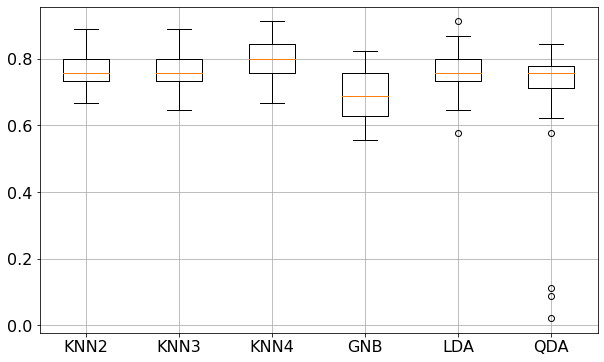

In [14]:
# plot boxplots of models' accuracies

plt.boxplot([KNN2,KNN3,KNN4,GNB,LDA,QDA])
plt.gca().set_xticklabels(["KNN2","KNN3","KNN4","GNB","LDA","QDA"], fontsize=16)
plt.gca().tick_params(which='both',labelsize=16)
plt.grid()
plt.gcf().set_size_inches(10,6)
plt.show()